In [20]:
# Librairies
import os
import sys
code_path = os.path.split(os.getcwd())[0]
sys.path.append(code_path)
import numpy as np
from scipy.sparse import load_npz
import seaborn as sns
import pandas as pd
from setting import *
from loader import *
from graphs import *
from utils import *
from plots_and_stats import *
from clustering import *

In [21]:
# Arguments
name = "demo"
normalize = True

In [22]:
# Path
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)
create_new_folder(os.path.join(save_path, "figures"))

In [23]:
## To have a look at results from different folders
# save_path = '/projects/GraphNEx/xai/XAI_for_genomics/Simulation/Results/SimuA'

In [24]:
# Load dataset
X, X_test, y, y_test, n_class, n_feat, class_name, feat_name = load_dataset(data_path, name, normalize, regroup=True)

# Describe data

In [25]:
print(f"Number of classes: {n_class}\nNumber of variables: {X.shape[1]}\nNumber of samples: {X.shape[0]}")
for c in range(n_class):
    print(f"    Class {c} - {np.sum(y==c)}")

Number of classes: 2
Number of variables: 60
Number of samples: 360
    Class 0 - 175
    Class 1 - 185


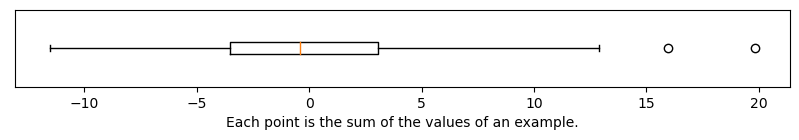

In [26]:
plt.figure(figsize=(10, 1))
plt.boxplot(np.round(np.sum(X, axis=1), 5), vert=False)
plt.yticks([])
plt.xlabel("Each point is the sum of the values of an example.")
plt.show()

Signals averaged per class


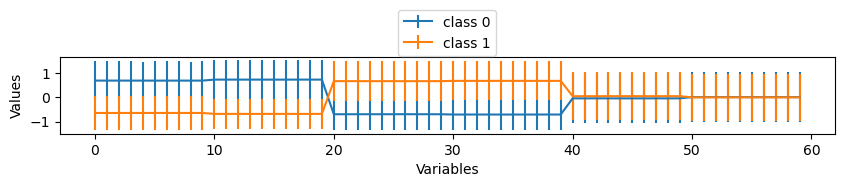

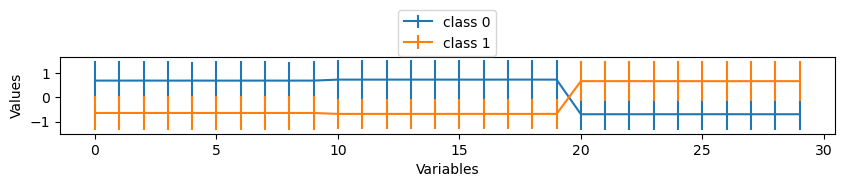

In [27]:
print("Signals averaged per class")
save_name = os.path.join(save_path, "figures", "average_signals")
order = np.argsort(-np.mean(X[y==0], axis=0))
plot_average_signals(X, y, n_variable=X.shape[1], save_name=save_name)
plot_average_signals(X, y, n_variable=30, save_name=None)

Random signals


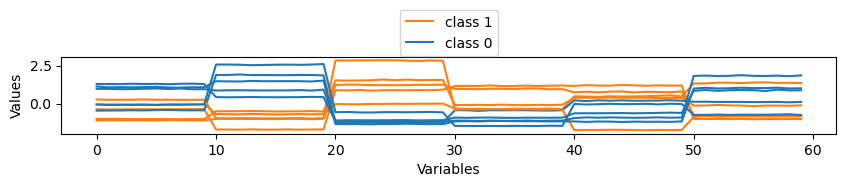

In [28]:
print("Random signals")
save_name = os.path.join(save_path, "figures", "random_signals")
plot_random_signals(X, y, n_sample_per_class=5, n_variable=60, save_name=save_name)

# Analysis data

### Correlation matrices

In [29]:
method = 'pearson_correlation'
min_value = 0.5

Matrix: pearson_correlation


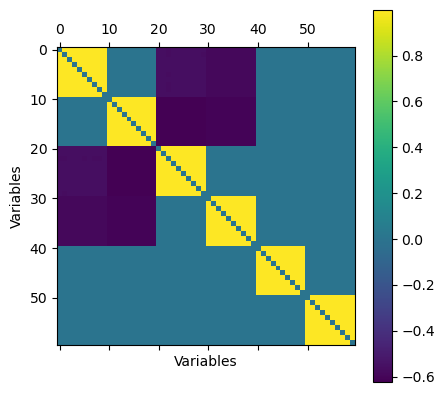

In [30]:
# Between variables
save_name = os.path.join(save_path, "figures", f"{method}_variables")
print(f"Matrix: {method}")
A = load_npz(os.path.join(save_path, 'graph', f'{method}_{min_value}_variables.npz'))
A = A.toarray()
plot_matrix(A, "Variables", "Variables", save_name)

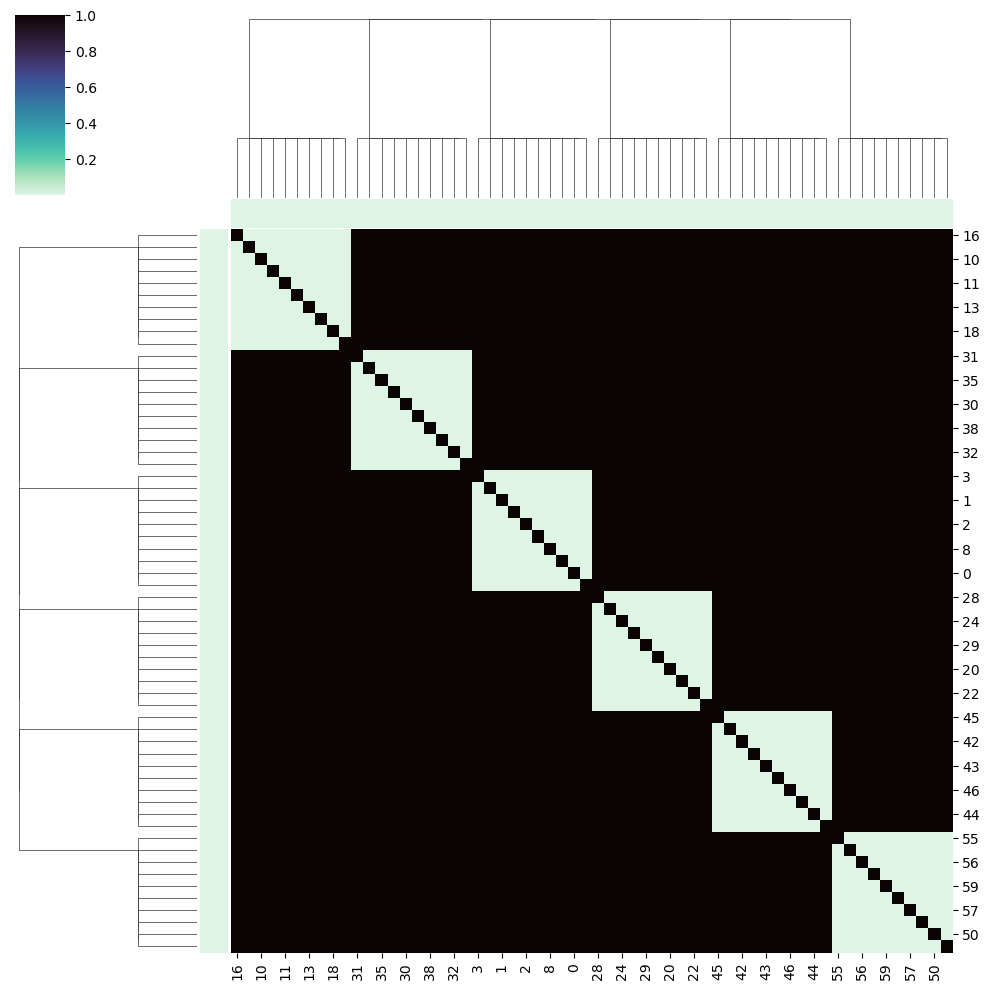

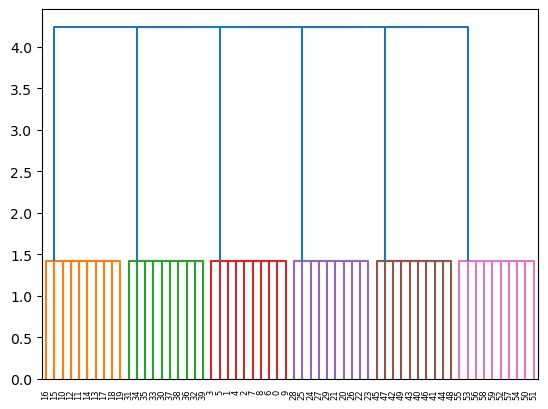

In [31]:
assert np.max(A) <= 1
dist = 1 - (A > 0) * 1. * A
save_name = os.path.join(save_path, "figures", "cluster_variables")
clusters, colors = cluster_nodes(dist, np.zeros(dist.shape), cut_dendogram=2, vmin=np.min(dist), vmax=np.max(dist), save_path=save_name)

Matrix: pearson_correlation


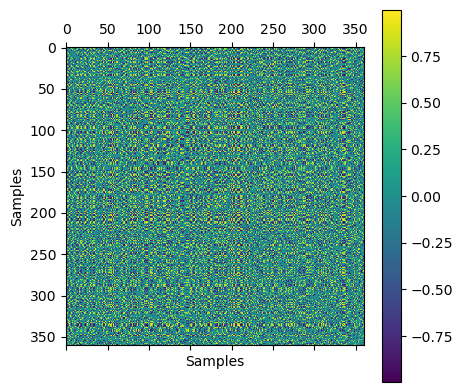

In [32]:
# Between samples
save_name = os.path.join(save_path, "figures", f"{method}_samples")
print(f"Matrix: {method}")
A = load_npz(os.path.join(save_path, 'graph', f'{method}_{min_value}_samples.npz'))
A = A.toarray()
plot_matrix(A, "Samples", "Samples", save_name)

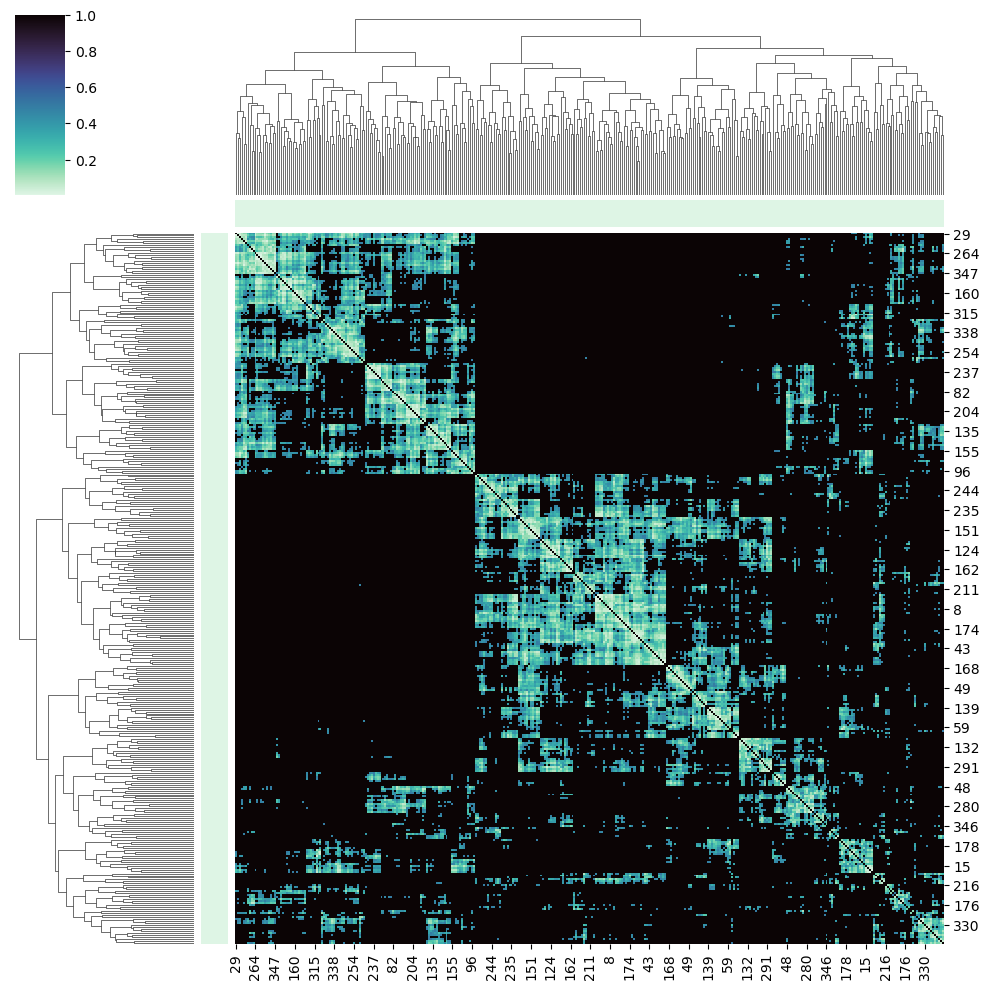

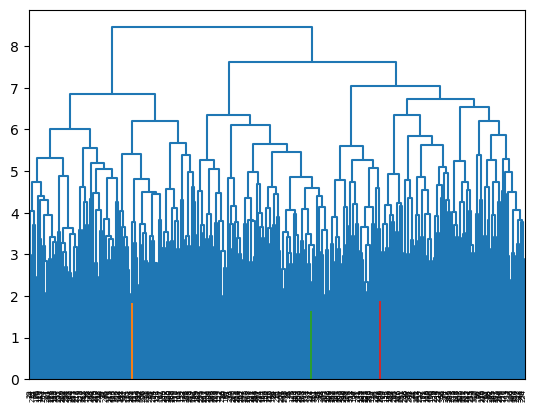

In [33]:
assert np.max(A) <= 1
dist = 1 - (A > 0) * 1. * A
save_name = os.path.join(save_path, "figures", "cluster_samples")
clusters, colors = cluster_nodes(dist, np.zeros(dist.shape), cut_dendogram=2, vmin=np.min(dist), vmax=np.max(dist), save_path=save_name)

### Dimensionality reduction and 2D visualisation

#### Variables

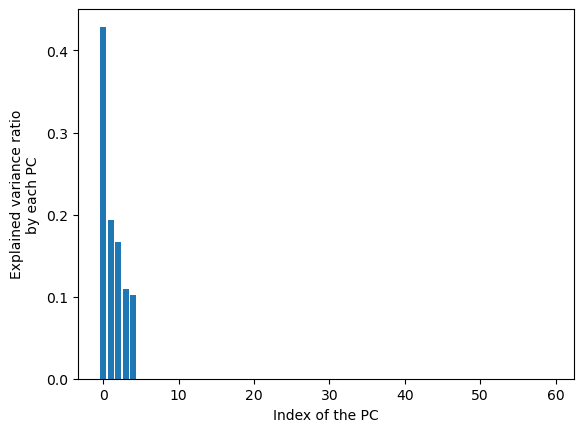

The total variance explained by the first 60 PC is 1.0.


In [34]:
_, _ = do_PCA(X.T)

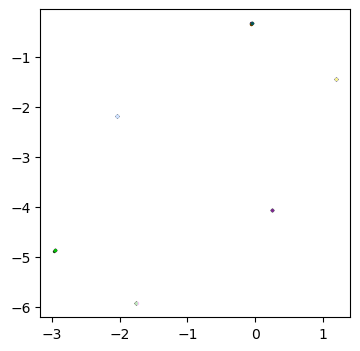

In [35]:
# T-SNE
save_name = os.path.join(save_path, "figures", "tSNE_variables")
Xr = do_TSNE(X.T, perplexity=30)
do_scatterplot_2D(Xr, np.arange(X.shape[1]).reshape(-1, 1), np.arange(X.shape[1]), xlabel=None, ylabel=None, dim1=0, dim2=1, legend=False, size=2, save_name=save_name)

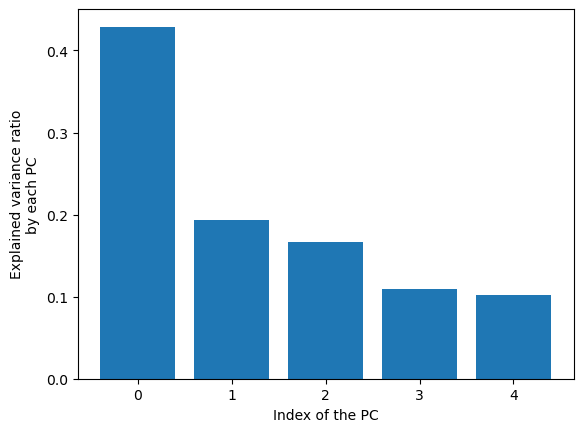

The total variance explained by the first 5 PC is 1.0.


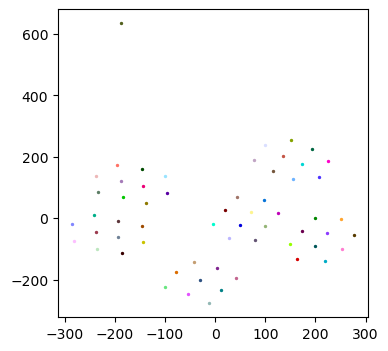

In [36]:
# PCA + T-SNE
n_dim = 5
Xt, alg = do_PCA(X.T, n_dim)
save_name = os.path.join(save_path, "figures", f"tSNE_PCA_{n_dim}_variables")
Xr = do_TSNE(Xt, perplexity=30)
do_scatterplot_2D(Xr, np.arange(X.shape[1]).reshape(-1, 1), np.arange(X.shape[1]), xlabel=None, ylabel=None, dim1=0, dim2=1, legend=False, size=2, save_name=save_name)

#### Samples

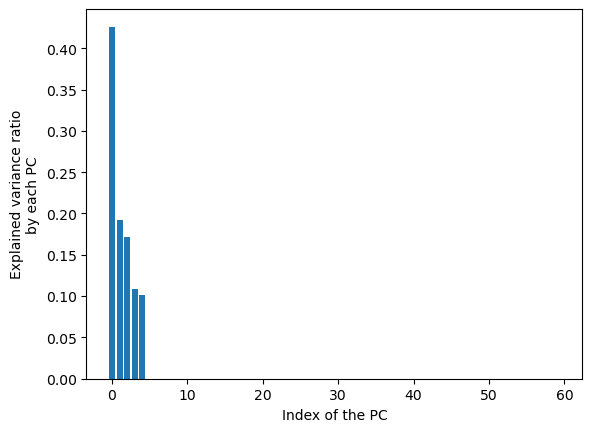

The total variance explained by the first 60 PC is 1.0.


In [37]:
_, _ = do_PCA(X)

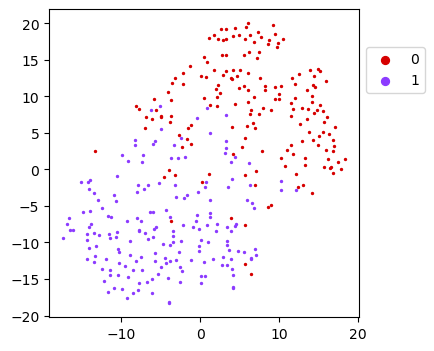

In [38]:
# T-SNE
save_name = os.path.join(save_path, "figures", "tSNE_samples")
Xr = do_TSNE(X, perplexity=30)
do_scatterplot_2D(Xr, y.reshape(-1, 1), class_name, xlabel=None, ylabel=None, dim1=0, dim2=1, legend=True, size=2, save_name=save_name)

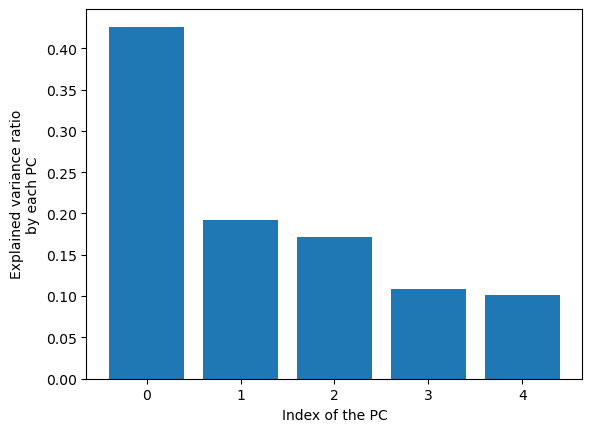

The total variance explained by the first 5 PC is 1.0.


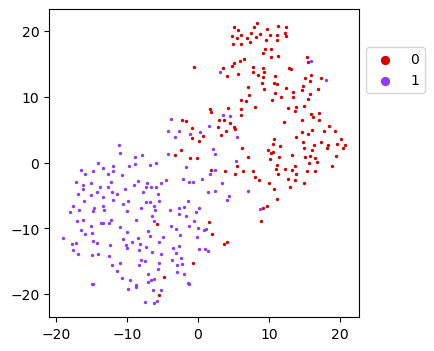

In [39]:
# PCA + T-SNE
n_dim = 5
Xt, alg = do_PCA(X, n_dim)
save_name = os.path.join(save_path, "figures", f"tSNE_PCA_{n_dim}_samples")
Xr = do_TSNE(Xt, perplexity=30)
do_scatterplot_2D(Xr, y.reshape(-1, 1), class_name, xlabel=None, ylabel=None, dim1=0, dim2=1, legend=True, size=2, save_name=save_name)

### Histograms and Boxplots

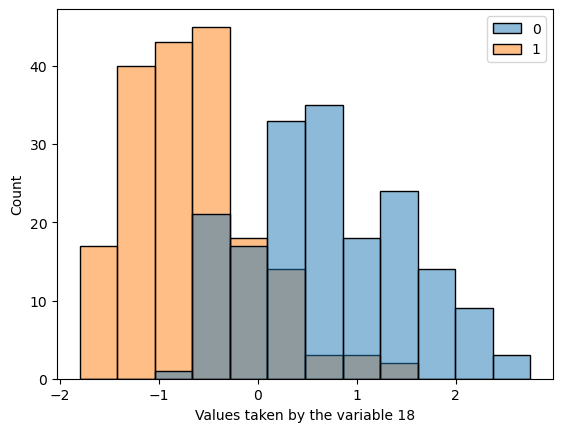

In [40]:
data = pd.DataFrame(X)
v = order[0]
sns.histplot(data=data, x=v, hue=y)
plt.xlabel(f"Values taken by the variable {v}")
plt.savefig(os.path.join(save_path, "figures", f"histogram_{v}_variable"), bbox_inches='tight')
plt.show()

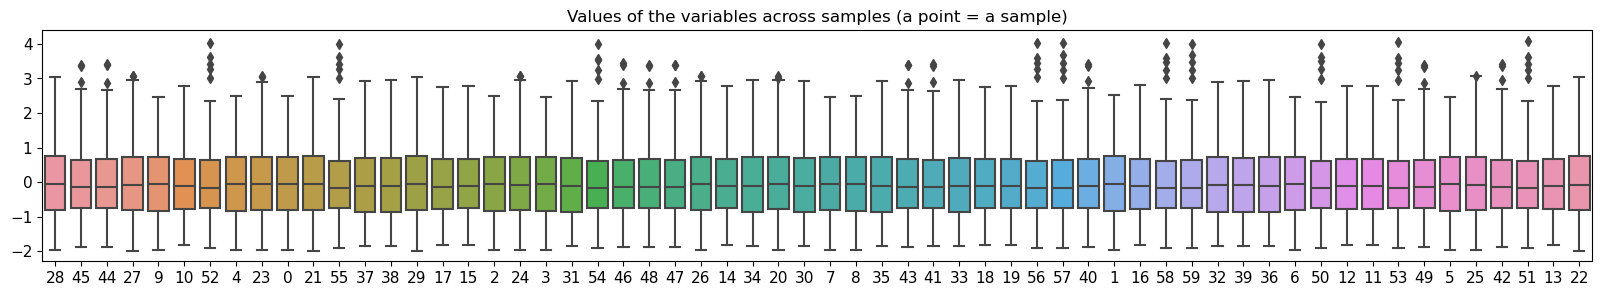

In [50]:
plot_variables_in_boxes(X, feat_name, n_feat=60, method='mean_max', save_name=os.path.join(save_path, "figures", f"boxplot_variable"))

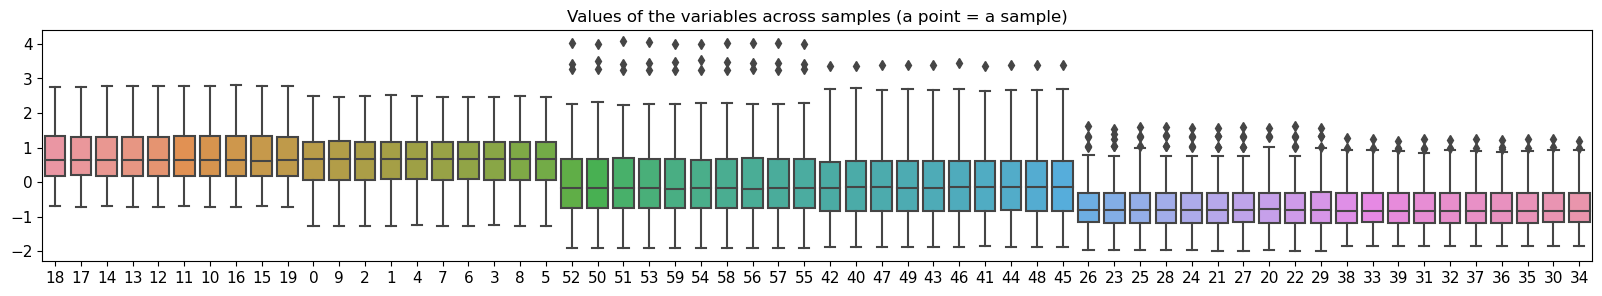

In [46]:
plot_variables_in_boxes(X[y==0], feat_name, n_feat=60, method='mean_max')

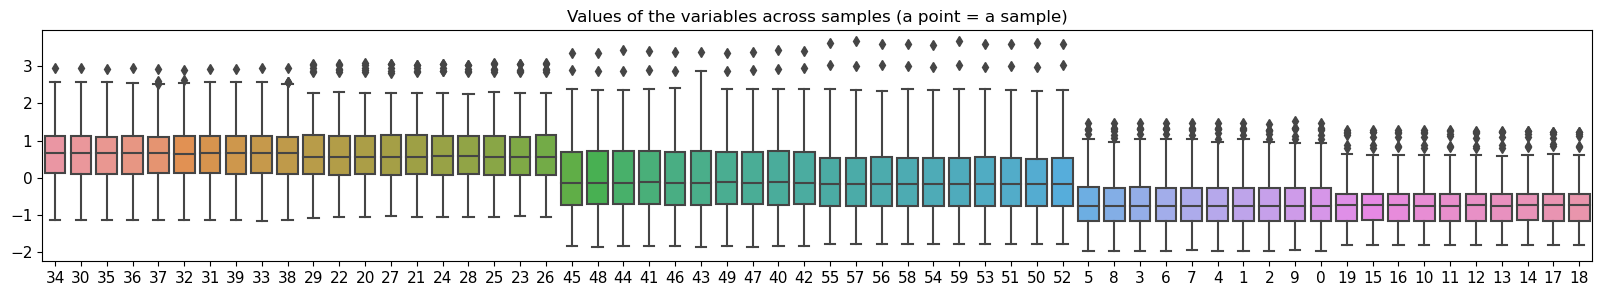

In [47]:
plot_variables_in_boxes(X[y==1], feat_name, n_feat=60, method='mean_max')